#week 6##
graphing top importers and exporters total from baci data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium


# Load data
country_codes = pd.read_csv('/content/country_codes_V202501.csv')
product_codes = pd.read_csv('/content/product_codes_HS22_V202501.csv')

import glob

# Define the file path pattern (update path as needed)
file_pattern = "/content/BACI_HS22_Y*_V202501.csv"

# Get a list of all matching files
file_list = glob.glob(file_pattern)

# Read and merge all files
df_list = [pd.read_csv(file) for file in file_list]
df = pd.concat(df_list, ignore_index=True)

# Rename columns for clarity
df.columns = ['Year', 'Exporter', 'Importer', 'Product', 'Value', 'Quantity']

# Merge country names
df = df.merge(country_codes, left_on='Exporter', right_on='country_code', how='left')
df.rename(columns={'country_name': 'Exporter_Name'}, inplace=True)
df = df.merge(country_codes, left_on='Importer', right_on='country_code', how='left')
df.rename(columns={'country_name': 'Importer_Name'}, inplace=True)

product_codes['Product'] = product_codes['code']
product_codes.drop(['code'], axis=1, inplace=True)
product_codes

df = df.merge(product_codes, on="Product", how="left")


In [ ]:
# Filter only the required product codes
required_product_codes = [
    845110, 845130, 842211, 851660, 845011, 845012, 845019, 845020, 842112, 845121, 845129, 841460, 851621, 851629, 841821,
    841822, 841829, 841830, 841840, 841510, 841581, 841582, 841861, 841583, 841850, 841869, 851650, 630110, 841451, 842310,
    845210, 850930, 850980, 851640, 910111, 910112, 910119, 910191, 910211, 910212, 910219, 910291, 910310, 910390, 910511,
    910521, 910591, 910700, 910811, 910812, 910819, 910820, 910890, 910911, 910919, 850940, 851672, 851679, 851610, 851671,
    850811, 850819, 850860, 850910, 851010, 851020, 851030, 851631, 851632, 851633, 846900, 846911, 846912, 846920, 846930,
    847010, 847021, 847029, 847110, 847170, 847180, 847190, 854389, 847141, 847149, 847150, 847130, 844331, 844332, 851721,
    851722, 851711, 851718, 851719, 851730, 851750, 851769, 851780, 852020, 852790, 903040, 851712, 851761, 851950, 852520,
    844312, 844339, 847040, 847050, 847090, 900911, 900912, 900921, 900922, 900930, 852821, 852822, 852841, 852849, 852851,
    852859, 853120, 851810, 851830, 852712, 852713, 852719, 852731, 852732, 852739, 852791, 852792, 852799, 847210, 847230,
    847290, 851762, 851840, 851850, 851910, 851920, 851921, 851929, 851930, 851931, 851939, 851940, 851981, 851989, 851992,
    851993, 851999, 852010, 852032, 852033, 852039, 852090, 852721, 852729, 852110, 852190, 852530, 852560, 852830, 852861,
    852869, 852871, 900661, 900669, 900711, 900719, 900720, 900810, 900830, 900840, 901010, 901050, 901060, 903130, 903149,
    851821, 851822, 852540, 852580, 852812, 852813, 852873, 852872, 851310, 853941, 853949, 853931, 853932, 853939, 851210,
    940510, 940520, 940530, 940540, 846721, 846722, 846729, 850810, 850820, 850880, 850920, 851511, 851519, 851521, 851529,
    851531, 843311, 843319, 950300, 950310, 950350, 950490, 950410, 920710, 920790, 902140, 901811, 901812, 901813, 901814,
    901819, 901841, 853110, 853180, 854340, 854370, 901730, 902410, 902480, 902519, 902580, 902610, 902620, 902680, 902710,
    902780, 903020, 903033, 903039, 903089, 903180, 903210, 901510, 901520, 901530, 901540, 901580, 847629, 847689, 847621, 847681
]

df = df[df['Product'].isin(required_product_codes)]

In [ ]:
df

,Year,Exporter,Importer,Product,Value,Quantity,country_code_x,Exporter_Name,country_iso2_x,country_iso3_x,country_code_y,Importer_Name,country_iso2_y,country_iso3_y,description
73,2023,4,36,902610,18.866,0.065,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,Instruments and apparatus: for measuring or ch...
74,2023,4,36,903180,0.861,0.002,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,"Instruments, appliances and machines: for meas..."
277,2023,4,40,844332,0.599,0.026,4,Afghanistan,AF,AFG,40,Austria,AT,AUT,"Printing, copying, and facsimile machines: sin..."
278,2023,4,40,846729,0.302,0.003,4,Afghanistan,AF,AFG,40,Austria,AT,AUT,"Tools: for working in the hand, with self-cont..."
280,2023,4,40,847170,0.316,0.002,4,Afghanistan,AF,AFG,40,Austria,AT,AUT,Units of automatic data processing machines: s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11232698,2023,894,842,901580,32.746,0.006,894,Zambia,ZM,ZMB,842,USA,US,USA,Surveying equipment: articles n.e.c. in headin...
11232701,2023,894,842,902610,4.532,0.029,894,Zambia,ZM,ZMB,842,USA,US,USA,Instruments and apparatus: for measuring or ch...
11232704,2023,894,842,903180,0.009,0.001,894,Zambia,ZM,ZMB,842,USA,US,USA,"Instruments, appliances and machines: for meas..."
11232733,2023,894,854,902580,0.337,0.002,894,Zambia,ZM,ZMB,854,Burkina Faso,BF,BFA,"Hydrometers and similar floating instruments, ..."


BY COUNTRY


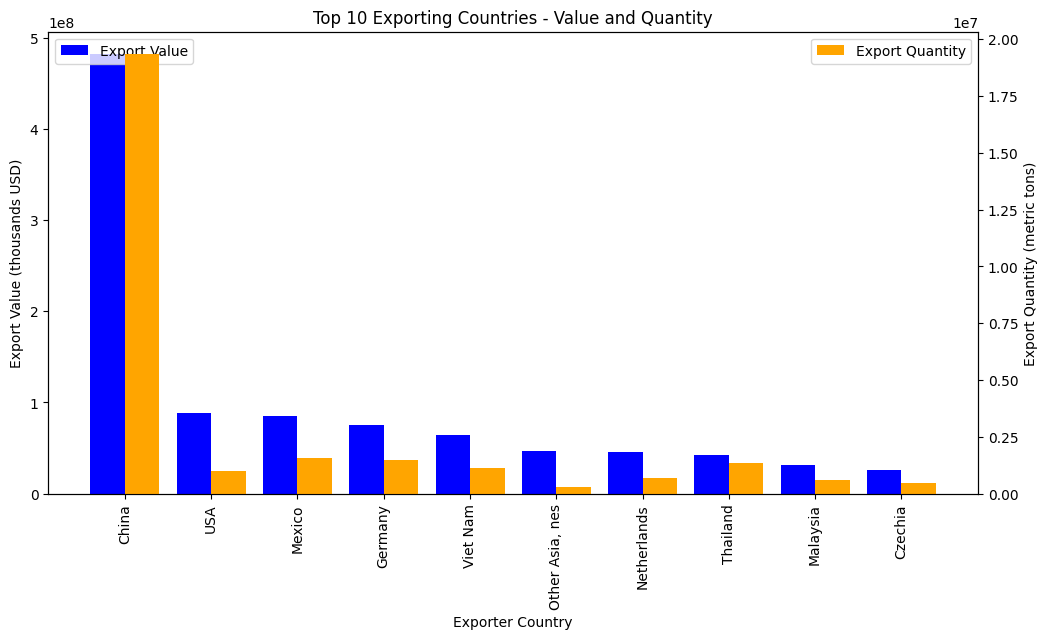

In [ ]:

df_exports = df.groupby('Exporter_Name').agg({'Value': 'sum', 'Quantity': 'sum'}).reset_index()
top_exporters = df_exports.nlargest(10, 'Value')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

width = 0.4
x = range(len(top_exporters))

ax1.bar([p - width/2 for p in x], top_exporters['Value'], width=width, color='blue', label='Export Value')
ax2.bar([p + width/2 for p in x], top_exporters['Quantity'], width=width, color='orange', label='Export Quantity')

ax1.set_xticks(x)
ax1.set_xticklabels(top_exporters['Exporter_Name'], rotation=90)
ax1.set_ylabel("Export Value (thousands USD)")
ax2.set_ylabel("Export Quantity (metric tons)")
ax1.set_xlabel("Exporter Country")
plt.title("Top 10 Exporting Countries - Value and Quantity")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


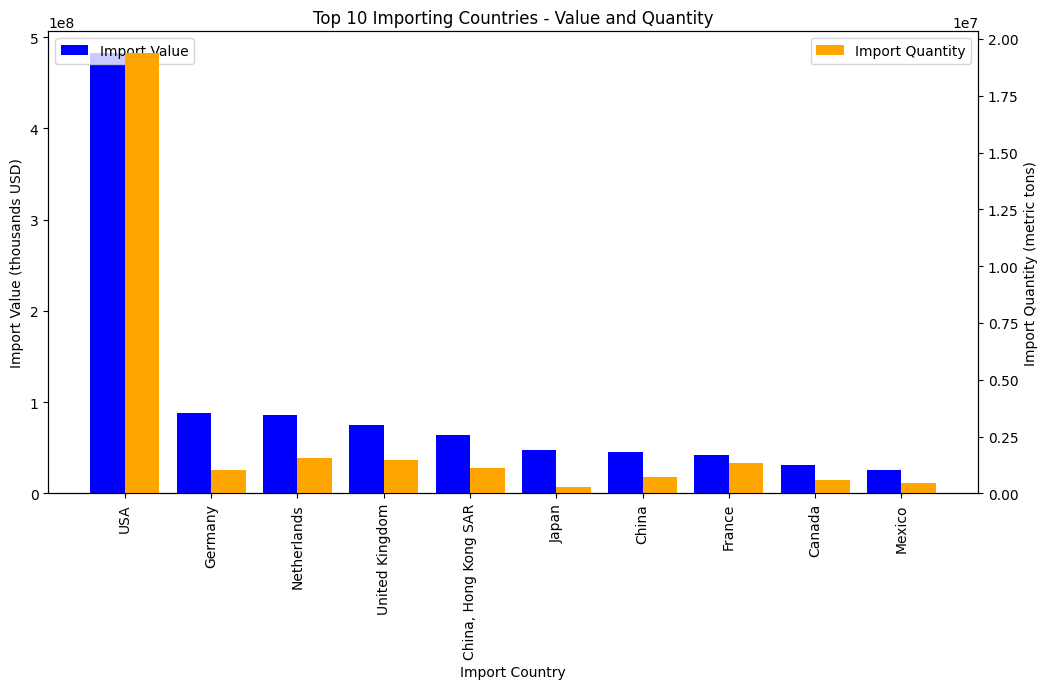

In [ ]:
df_imports = df.groupby('Importer_Name').agg({'Value': 'sum', 'Quantity': 'sum'}).reset_index()

top_importers = df_imports.nlargest(10, 'Value')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

width = 0.4
x = range(len(top_importers))

ax1.bar([p - width/2 for p in x], top_exporters['Value'], width=width, color='blue', label='Import Value')
ax2.bar([p + width/2 for p in x], top_exporters['Quantity'], width=width, color='orange', label='Import Quantity')

ax1.set_xticks(x)
ax1.set_xticklabels(top_importers['Importer_Name'], rotation=90)
ax1.set_ylabel("Import Value (thousands USD)")
ax2.set_ylabel("Import Quantity (metric tons)")
ax1.set_xlabel("Import Country")
plt.title("Top 10 Importing Countries - Value and Quantity")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


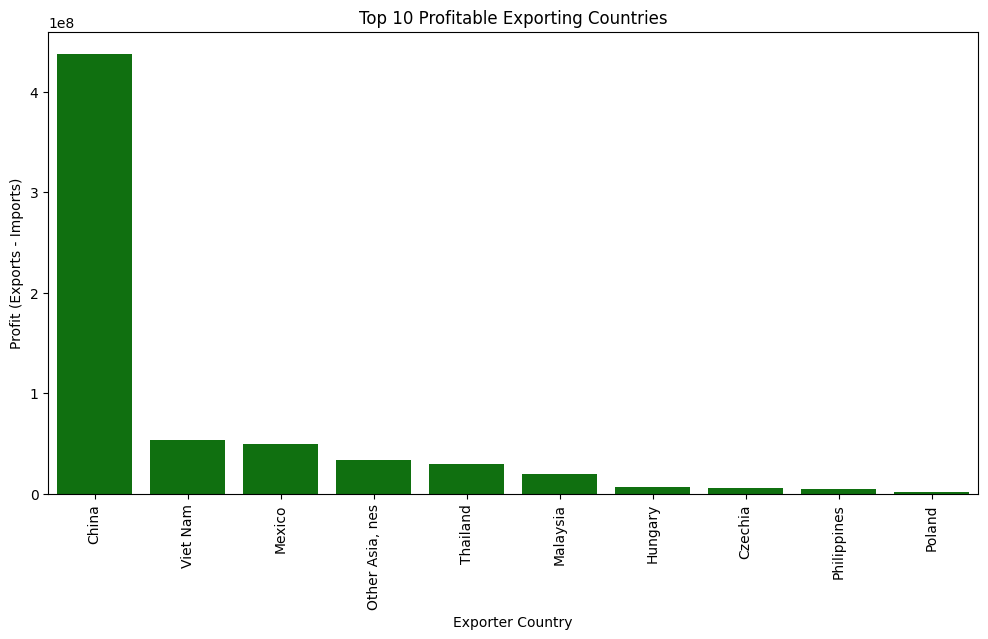

In [ ]:
df_imports.rename(columns={'Value': 'Import_Value'}, inplace=True)

df_profit = df_exports.merge(df_imports, left_on='Exporter_Name', right_on='Importer_Name', how='left').fillna(0)
df_profit['Profit'] = df_profit['Value'] - df_profit['Import_Value']

top_profitable = df_profit.nlargest(10, 'Profit')

plt.figure(figsize=(12, 6))
sns.barplot(x='Exporter_Name', y='Profit', data=top_profitable, color='green')
plt.xticks(rotation=90)
plt.ylabel("Profit (Exports - Imports)")
plt.xlabel("Exporter Country")
plt.title("Top 10 Profitable Exporting Countries")
plt.show()


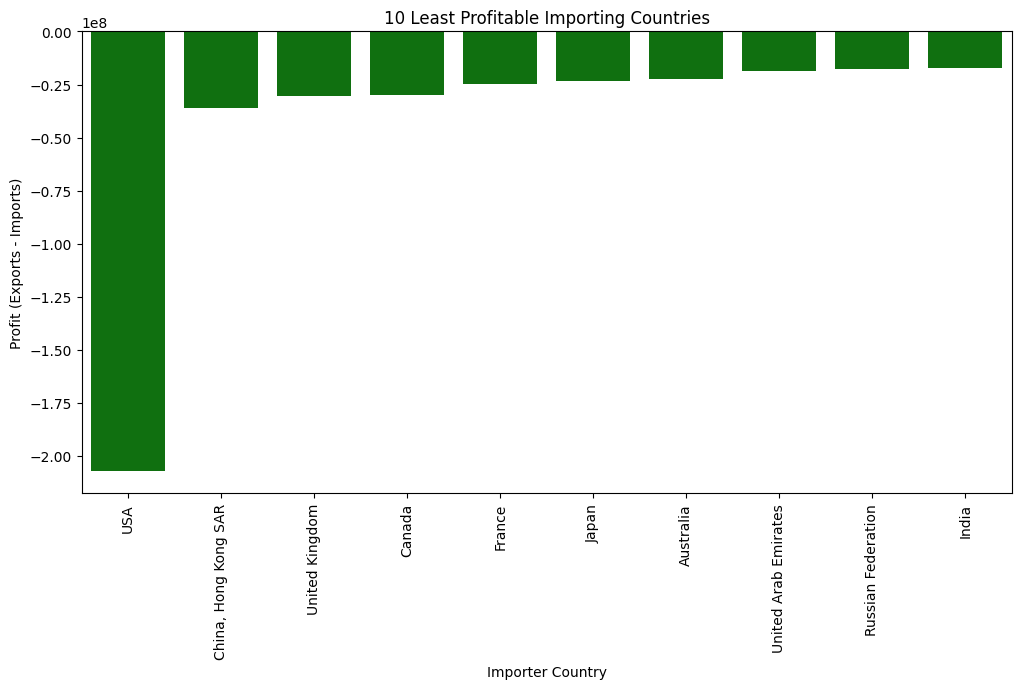

In [ ]:
# Get top 10 least profitable importers
least_profitable = df_profit.nsmallest(10, 'Profit')

plt.figure(figsize=(12, 6))
sns.barplot(x='Importer_Name', y='Profit', data=least_profitable, color='green')
plt.xticks(rotation=90)
plt.ylabel("Profit (Exports - Imports)")
plt.xlabel("Importer Country")
plt.title("10 Least Profitable Importing Countries")
plt.show()


In [ ]:
def get_top_trading_partners(country, df):
    exports = df[df['Exporter_Name'] == country].groupby('Importer_Name').agg({'Value': 'sum'}).nlargest(5, 'Value').reset_index()
    imports = df[df['Importer_Name'] == country].groupby('Exporter_Name').agg({'Value': 'sum'}).nlargest(5, 'Value').reset_index()
    return exports, imports




In [ ]:
for country in top_profitable['Exporter_Name']:
  top_export_partners, top_import_partners = get_top_trading_partners(country, df)

  print(f"Top 5 export partners for {country}:\n", top_export_partners)
  print(f"Top 5 import partners for {country}:\n", top_import_partners)

Top 5 export partners for China:
           Importer_Name         Value
0                   USA  9.417314e+07
1               Germany  3.064220e+07
2  China, Hong Kong SAR  3.018386e+07
3                 Japan  2.711651e+07
4           Netherlands  2.105036e+07
Top 5 import partners for China:
    Exporter_Name        Value
0       Viet Nam  6362234.568
1  Rep. of Korea  5510266.269
2        Germany  5017441.456
3            USA  4015298.831
4          Japan  3771393.740
Top 5 export partners for Viet Nam:
     Importer_Name         Value
0             USA  3.161237e+07
1           China  6.362235e+06
2          Canada  2.277639e+06
3  United Kingdom  2.138442e+06
4         Germany  2.099466e+06
Top 5 import partners for Viet Nam:
           Exporter_Name        Value
0                 China  6388705.898
1              Thailand   859240.968
2              Malaysia   674466.839
3             Singapore   586058.036
4  China, Hong Kong SAR   413065.139
Top 5 export partners for Mexico:
  

In [ ]:
for country in least_profitable['Importer_Name']:
  top_export_partners, top_import_partners = get_top_trading_partners(country, df)

  print(f"Top 5 export partners for {country}:\n", top_export_partners)
  print(f"Top 5 import partners for {country}:\n", top_import_partners)

Top 5 export partners for USA:
   Importer_Name         Value
0        Canada  1.456828e+07
1        Mexico  1.357249e+07
2   Netherlands  5.953497e+06
3       Germany  4.686425e+06
4         China  4.015299e+06
Top 5 import partners for USA:
      Exporter_Name         Value
0            China  9.417314e+07
1           Mexico  6.800427e+07
2         Viet Nam  3.161237e+07
3  Other Asia, nes  2.296454e+07
4         Thailand  1.626549e+07
Top 5 export partners for China, Hong Kong SAR:
         Importer_Name        Value
0         Netherlands  1692754.870
1           Australia  1024971.493
2       Rep. of Korea   929431.099
3  Russian Federation   906611.856
4               China   574126.559
Top 5 import partners for China, Hong Kong SAR:
      Exporter_Name         Value
0            China  3.018386e+07
1  Other Asia, nes  2.797756e+06
2         Thailand  2.171668e+06
3              USA  1.966603e+06
4         Malaysia  1.458120e+06
Top 5 export partners for United Kingdom:
   Importe

BY REGION

In [ ]:
import pandas as pd

data = {
    "Indicator": [
        "Waste generation (Mt) - Total e-waste",
        "Waste generation (Mt) - Embedded Waste Printed Circuit Board",
        "Environmental sound collection and recycling (Mt) - Total e-waste",
        "Environmental sound collection and recycling (Mt) - Printed Circuit Board Waste",
        "Not environmental sound managed e-waste (Mt) - Total e-waste",
        "Not environmental sound managed e-waste (Mt) - Embedded and Printed Circuit Board Waste",
        "Environmental sound collection and recycling rates - Total e-waste",
        "Environmental sound collection and recycling rates - Printed Circuit Board Waste",
        "Not environmental sound managed rates - Total e-waste",
        "Not environmental sound managed rates - Printed Circuit Board Waste",
        "Total Exports (kt)",
        "Controlled - E-waste reported as hazardous",
        "Controlled - Printed Circuit Board Waste",
        "Uncontrolled - Undocumented exports of mixed used EEE and e-waste",
        "Total Imports (kt)",
        "Controlled - E-waste reported as hazardous",
        "Controlled - Printed Circuit Board Waste",
        "Uncontrolled - Undocumented exports of mixed used EEE and e-waste",
        "Inhabitants (Million)"
    ],
    "Africa": [2.9, 0.1, 0.03, 0.01, 2.9, 0.1, "1%", "13%", "99%", "87%", 132, 12, 7, 113, 546, 19, 0, 527, 1152],
    "Americas": [13.1, 0.3, 1.2, 0.1, 11.9, 0.2, "9%", "44%", "91%", "56%", 547, 31, 128, 388, 393, 24, 65, 305, 984],
    "Asia": [24.9, 0.6, 2.9, 0.1, 22.0, 0.5, "12%", "17%", "88%", "83%", 2537, 1038, 36, 1463, 2889, 964, 111, 1814, 4445],
    "Europe": [12.0, 0.3, 5.1, 0.2, 6.9, 0.1, "42%", "61%", "58%", "39%", 1850, 375, 184, 1290, 1248, 457, 172, 619, 740],
    "Oceania": [0.7, 0.01, 0.06, 0.005, 0.6, 0.01, "9%", "31%", "91%", "69%", 21, 8, 4, 10, 0, 0, 0, 0, 42],
    "Global": [53.6, 1.2, 9.3, 0.4, 44.3, 0.8, "17%", "34%", "83%", "66%", 5086, 1464, 358, 3264, 5076, 1464, 348, 3264, 7363]
}

# Create DataFrame
df_pdf = pd.DataFrame(data)

df_pdf

,Indicator,Africa,Americas,Asia,Europe,Oceania,Global
0,Waste generation (Mt) - Total e-waste,2.9,13.1,24.9,12.0,0.7,53.6
1,Waste generation (Mt) - Embedded Waste Printed...,0.1,0.3,0.6,0.3,0.01,1.2
2,Environmental sound collection and recycling (...,0.03,1.2,2.9,5.1,0.06,9.3
3,Environmental sound collection and recycling (...,0.01,0.1,0.1,0.2,0.005,0.4
4,Not environmental sound managed e-waste (Mt) -...,2.9,11.9,22.0,6.9,0.6,44.3
5,Not environmental sound managed e-waste (Mt) -...,0.1,0.2,0.5,0.1,0.01,0.8
6,Environmental sound collection and recycling r...,1%,9%,12%,42%,9%,17%
7,Environmental sound collection and recycling r...,13%,44%,17%,61%,31%,34%
8,Not environmental sound managed rates - Total ...,99%,91%,88%,58%,91%,83%
9,Not environmental sound managed rates - Printe...,87%,56%,83%,39%,69%,66%


In [ ]:
# Load country-to-region mapping based on ISO codes
iso_to_region = {
    'Africa': ["DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CPV", "CMR", "CAF", "TCD", "COM", "COD", "DJI", "EGY", "GNQ", "ERI", "SWZ", "ETH", "GAB", "GMB", "GHA", "GIN", "GNB", "CIV", "KEN", "LSO", "LBR", "LBY", "MDG", "MWI", "MLI", "MRT", "MUS", "MAR", "MOZ", "NAM", "NER", "NGA", "RWA", "STP", "SEN", "SYC", "SLE", "SOM", "ZAF", "SSD", "SDN", "TZA", "TGO", "TUN", "UGA", "ZMB", "ZWE"],
    'Americas': ["ATG", "ARG", "BHS", "BRB", "BLZ", "BOL", "BRA", "CAN", "CHL", "COL", "CRI", "CUB", "DMA", "DOM", "ECU", "SLV", "GRD", "GTM", "GUY", "HTI", "HND", "JAM", "MEX", "NIC", "PAN", "PRY", "PER", "KNA", "LCA", "VCT", "SUR", "TTO", "USA", "URY", "VEN"],
    'Asia': ["AFG", "ARM", "AZE", "BHR", "BGD", "BTN", "BRN", "KHM", "CHN", "CYP", "GEO", "IND", "IDN", "IRN", "IRQ", "ISR", "JPN", "JOR", "KAZ", "KWT", "KGZ", "LAO", "LBN", "MYS", "MDV", "MNG", "MMR", "NPL", "PRK", "OMN", "PAK", "PSE", "PHL", "QAT", "SAU", "SGP", "KOR", "LKA", "SYR", "TJK", "THA", "TLS", "TUR", "TKM", "ARE", "UZB", "VNM", "YEM"],
    'Europe': ["ALB", "AND", "AUT", "BLR", "BEL", "BIH", "BGR", "HRV", "CZE", "DNK", "EST", "FIN", "FRA", "DEU", "GRC", "HUN", "ISL", "IRL", "ITA", "LVA", "LIE", "LTU", "LUX", "MLT", "MDA", "MCO", "MNE", "NLD", "MKD", "NOR", "POL", "PRT", "ROU", "RUS", "SMR", "SRB", "SVK", "SVN", "ESP", "SWE", "CHE", "UKR", "GBR", "VAT"],
    'Oceania': ["AUS", "FJI", "KIR", "MHL", "FSM", "NRU", "NZL", "PLW", "PNG", "WSM", "SLB", "TON", "TUV", "VUT"]
}


df_regions = df

# Function to map ISO code to region
def get_region(iso_code):
    for region, iso_list in iso_to_region.items():
        if iso_code in iso_list:
            return region
    return 'Other'

# Assign regions using ISO codes
df_regions['Exporter_Region'] = df_regions['country_iso3_x'].apply(get_region)
df_regions['Importer_Region'] = df_regions['country_iso3_y'].apply(get_region)

# Split dataset by region
# df_africa = df_regions[df_regions['Exporter_Region'] == 'Africa']
# df_americas = df_regions[df_regions['Exporter_Region'] == 'Americas']
# df_asia = df_regions[df_regions['Exporter_Region'] == 'Asia']
# df_europe = df_regions[df_regions['Exporter_Region'] == 'Europe']
# df_oceania = df_regions[df_regions['Exporter_Region'] == 'Oceania']
df_global = df_regions

In [ ]:
df_global

,Year,Exporter,Importer,Product,Value,Quantity,country_code_x,Exporter_Name,country_iso2_x,country_iso3_x,country_code_y,Importer_Name,country_iso2_y,country_iso3_y,description,Exporter_Region,Importer_Region
73,2023,4,36,902610,18.866,0.065,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,Instruments and apparatus: for measuring or ch...,Asia,Oceania
74,2023,4,36,903180,0.861,0.002,4,Afghanistan,AF,AFG,36,Australia,AU,AUS,"Instruments, appliances and machines: for meas...",Asia,Oceania
277,2023,4,40,844332,0.599,0.026,4,Afghanistan,AF,AFG,40,Austria,AT,AUT,"Printing, copying, and facsimile machines: sin...",Asia,Europe
278,2023,4,40,846729,0.302,0.003,4,Afghanistan,AF,AFG,40,Austria,AT,AUT,"Tools: for working in the hand, with self-cont...",Asia,Europe
280,2023,4,40,847170,0.316,0.002,4,Afghanistan,AF,AFG,40,Austria,AT,AUT,Units of automatic data processing machines: s...,Asia,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11232698,2023,894,842,901580,32.746,0.006,894,Zambia,ZM,ZMB,842,USA,US,USA,Surveying equipment: articles n.e.c. in headin...,Africa,Americas
11232701,2023,894,842,902610,4.532,0.029,894,Zambia,ZM,ZMB,842,USA,US,USA,Instruments and apparatus: for measuring or ch...,Africa,Americas
11232704,2023,894,842,903180,0.009,0.001,894,Zambia,ZM,ZMB,842,USA,US,USA,"Instruments, appliances and machines: for meas...",Africa,Americas
11232733,2023,894,854,902580,0.337,0.002,894,Zambia,ZM,ZMB,854,Burkina Faso,BF,BFA,"Hydrometers and similar floating instruments, ...",Africa,Africa


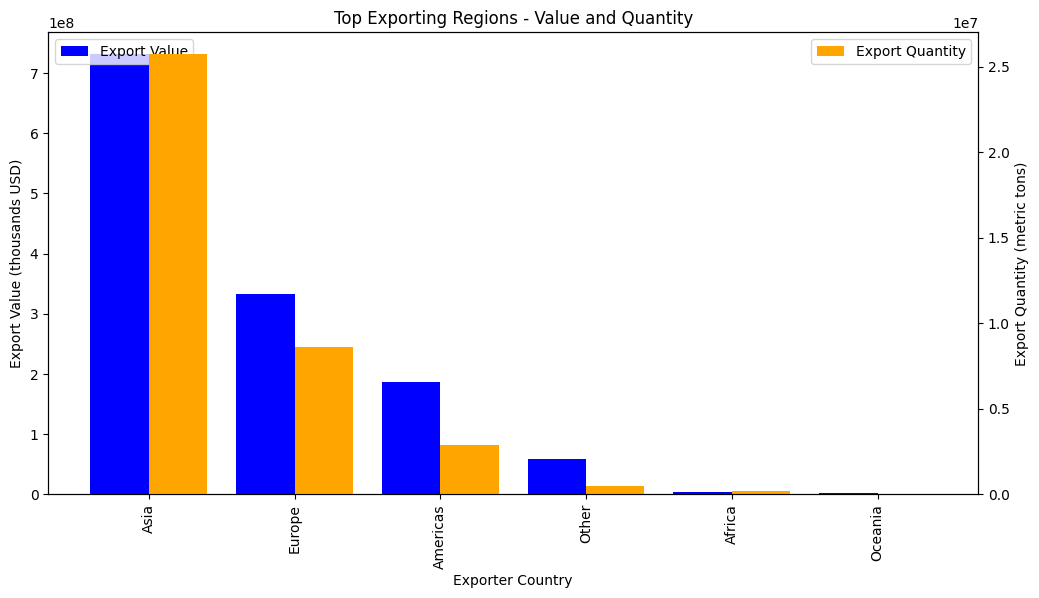

In [ ]:

df_region_exports = df_global.groupby('Exporter_Region').agg({'Value': 'sum', 'Quantity': 'sum'}).reset_index()
top_exporters = df_region_exports.nlargest(10, 'Value')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

width = 0.4
x = range(len(top_exporters))

ax1.bar([p - width/2 for p in x], top_exporters['Value'], width=width, color='blue', label='Export Value')
ax2.bar([p + width/2 for p in x], top_exporters['Quantity'], width=width, color='orange', label='Export Quantity')

ax1.set_xticks(x)
ax1.set_xticklabels(top_exporters['Exporter_Region'], rotation=90)
ax1.set_ylabel("Export Value (thousands USD)")
ax2.set_ylabel("Export Quantity (metric tons)")
ax1.set_xlabel("Exporter Country")
plt.title("Top Exporting Regions - Value and Quantity")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


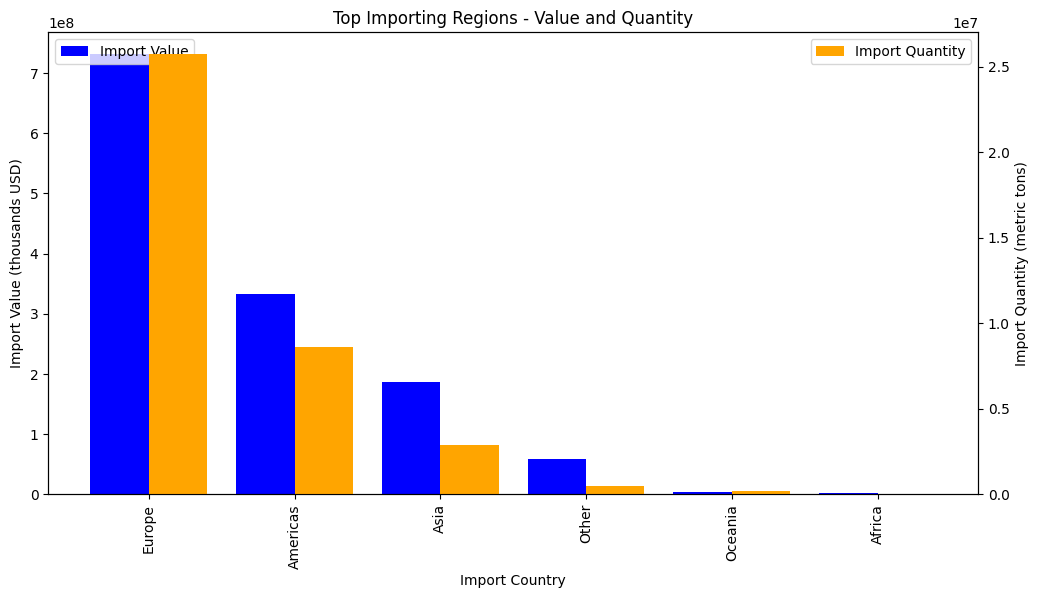

In [ ]:
df_region_imports = df.groupby('Importer_Region').agg({'Value': 'sum', 'Quantity': 'sum'}).reset_index()

top_importers = df_region_imports.nlargest(10, 'Value')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

width = 0.4
x = range(len(top_importers))

ax1.bar([p - width/2 for p in x], top_exporters['Value'], width=width, color='blue', label='Import Value')
ax2.bar([p + width/2 for p in x], top_exporters['Quantity'], width=width, color='orange', label='Import Quantity')

ax1.set_xticks(x)
ax1.set_xticklabels(top_importers['Importer_Region'], rotation=90)
ax1.set_ylabel("Import Value (thousands USD)")
ax2.set_ylabel("Import Quantity (metric tons)")
ax1.set_xlabel("Import Country")
plt.title("Top Importing Regions - Value and Quantity")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


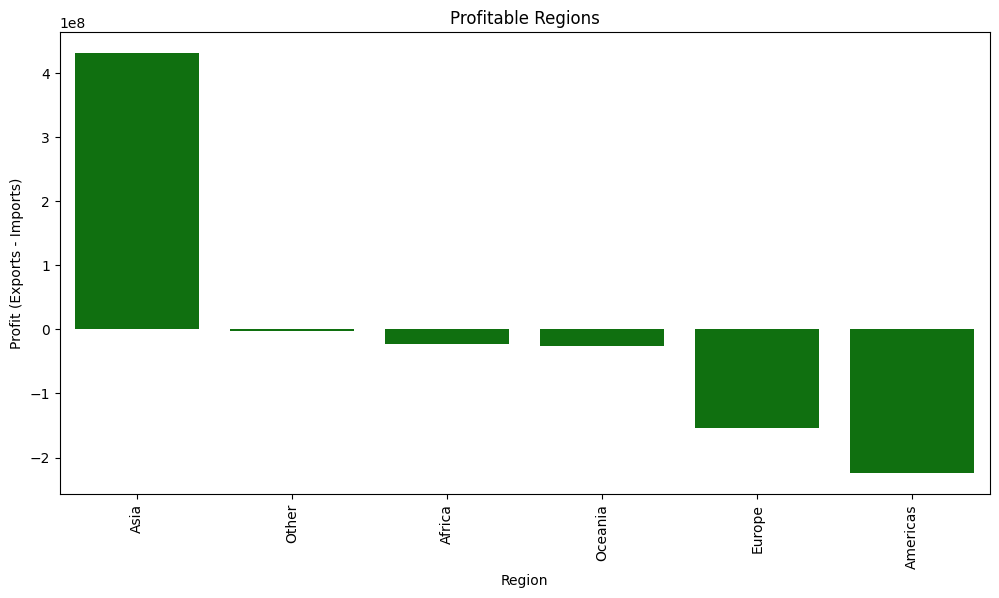

In [ ]:
df_region_imports.rename(columns={'Value': 'Import_Value'}, inplace=True)

df_profit = df_region_exports.merge(df_region_imports, left_on='Exporter_Region', right_on='Importer_Region', how='left').fillna(0)
df_profit['Profit'] = df_profit['Value'] - df_profit['Import_Value']

top_profitable = df_profit.nlargest(10, 'Profit')

plt.figure(figsize=(12, 6))
sns.barplot(x='Exporter_Region', y='Profit', data=top_profitable, color='green')
plt.xticks(rotation=90)
plt.ylabel("Profit (Exports - Imports)")
plt.xlabel("Region")
plt.title("Profitable Regions")
plt.show()


In [ ]:
def get_top_trading_partners(region, df):
    exports = df_global[df_global['Exporter_Region'] == region].groupby('Importer_Region').agg({'Value': 'sum'}).nlargest(5, 'Value').reset_index()
    imports = df_global[df_global['Importer_Region'] == region].groupby('Exporter_Region').agg({'Value': 'sum'}).nlargest(5, 'Value').reset_index()
    return exports, imports


In [ ]:
for region in top_profitable['Exporter_Region']:
  top_export_partners, top_import_partners = get_top_trading_partners(region, df)

  print(f"Top 5 export regions for {region}:\n", top_export_partners)
  print(f"Top 5 import regions for {region}:\n", top_import_partners)

Top 5 export regions for Asia:
   Importer_Region         Value
0        Americas  2.325647e+08
1            Asia  2.171887e+08
2          Europe  1.947631e+08
3           Other  5.008136e+07
4         Oceania  1.960772e+07
Top 5 import regions for Asia:
   Exporter_Region         Value
0            Asia  2.171887e+08
1          Europe  4.170026e+07
2        Americas  2.718735e+07
3           Other  1.257310e+07
4          Africa  1.080338e+06
Top 5 export regions for Other:
   Importer_Region         Value
0        Americas  2.579505e+07
1          Europe  1.460777e+07
2            Asia  1.257310e+07
3           Other  3.119455e+06
4         Oceania  1.625696e+06
Top 5 import regions for Other:
   Exporter_Region         Value
0            Asia  5.008136e+07
1          Europe  3.964319e+06
2        Americas  3.908771e+06
3           Other  3.119455e+06
4         Oceania  1.573665e+05
Top 5 export regions for Africa:
   Importer_Region        Value
0          Europe  1425681.979
1     